
# <span style="color:rgb(213,80,0)">Second Order Filter Design</span>

Created: 27.05.2025 by Olga Ioffe


For this exercise we will be using the following notation:


$$H(s)=\frac{1+2\cdot a_1 \cdot Ts+a_2 \cdot (Ts)^2 }{1+2\cdot b_1 \cdot Ts+(Ts)^2 }\Leftrightarrow \frac{a_2 s^2 +2a_1 \omega s+\omega^2 }{s^2 +2b_1 \omega s+\omega^2 }$$

Where: $\omega =2\pi f;T=1/\omega$

## Low Pass filter 2nd order

This is the simple case where


 $a_1 =a_2 =0$ and


 $b_1 =\zeta$ \- the damping of the system


$$H_{LPF} (s)=\frac{1}{1+2\cdot b_1 \cdot Ts+(Ts)^2 }\Leftrightarrow \frac{\omega^2 }{s^2 +2b_1 \omega s+\omega^2 }$$

In [1]:
freq = 100; %[Hz]

b1 = [0.2 0.5 0.7 0.9];
a1 = 0;
a2 = 0;

omega = 2*pi*freq;
T = 1/omega;

figure(1)
hold on
for indb = 1:length(b1)
    tf_lpf = tf([a2*T^2, 2*a1*T, 1], [T^2, 2*b1(indb)*T, 1])

    bodeplot(tf_lpf)
end

tf_lpf =
 
                 1
  -------------------------------
  2.533e-06 s^2 + 0.0006366 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lpf =
 
                1
  ------------------------------
  2.533e-06 s^2 + 0.001592 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lpf =
 
                1
  ------------------------------
  2.533e-06 s^2 + 0.002228 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lpf =
 
                1
  ------------------------------
  2.533e-06 s^2 + 0.002865 s + 1
 
Continuous-time transfer function.
Model Properties


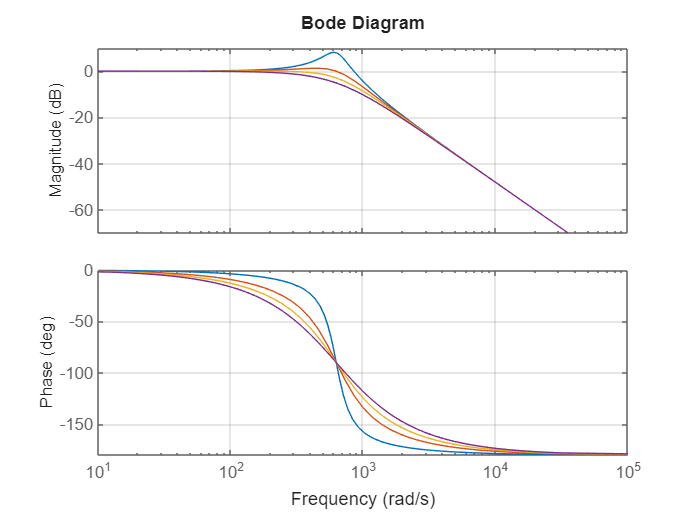

In [2]:
grid on

## Notch Filter

$$a_1 =0$$

$$H_{notch} (s)=\frac{1+a_2 \cdot (Ts)^2 }{1+2\cdot b_1 \cdot Ts+(Ts)^2 }\Leftrightarrow \frac{a_2 s^2 +\omega^2 }{s^2 +2b_1 \omega s+\omega^2 }$$

Creating two zeros on the Re axis, with the frequency $\omega_0 =\frac{\omega }{\sqrt{a_2 }}$


 $b_1$ is, as previously, the damping. Here it dictates width and depth of the filter.


For $a_2 =1$ the pole and the zero frequency are the same and the result is a pure filter.


For $a_2 \not= 1$ the filtered frequency is $\omega_0$ .


The damping dictated by $b_1$ is still about the frequency of the poles.


If $a_2 >1$ then the gain at high frequencies is > 0dB


If $a_2 <1$ then the gain at high frequencies is < 0dB. This allows creating a combined notch with high frequency suppresion.


In [3]:
freq = 100; %[Hz]

b1 = [0.2 0.7];
a1 = 0;
a2 = [0.5 1 2];

omega = 2*pi*freq;
T = 1/omega;

figure(2)
hold on
for indb = 1:length(b1)
    for inda2 = 1:length(a2)
        tf_notch = tf([a2(inda2)*T^2, 2*a1*T, 1], [T^2, 2*b1(indb)*T, 1])

        bodeplot(tf_notch)
    end
end

tf_notch =
 
1.267e-06 s^2 + 1
  -------------------------------
  2.533e-06 s^2 + 0.0006366 s + 1
 
Continuous-time transfer function.
Model Properties
tf_notch =
 
         2.533e-06 s^2 + 1
  -------------------------------
  2.533e-06 s^2 + 0.0006366 s + 1
 
Continuous-time transfer function.
Model Properties
tf_notch =
 
         5.066e-06 s^2 + 1
  -------------------------------
  2.533e-06 s^2 + 0.0006366 s + 1
 
Continuous-time transfer function.
Model Properties
tf_notch =
 
1.267e-06 s^2 + 1
  ------------------------------
  2.533e-06 s^2 + 0.002228 s + 1
 
Continuous-time transfer function.
Model Properties
tf_notch =
 
        2.533e-06 s^2 + 1
  ------------------------------
  2.533e-06 s^2 + 0.002228 s + 1
 
Continuous-time transfer function.
Model Properties
tf_notch =
 
        5.066e-06 s^2 + 1
  ------------------------------
  2.533e-06 s^2 + 0.002228 s + 1
 
Continuous-time transfer function.
Model Properties


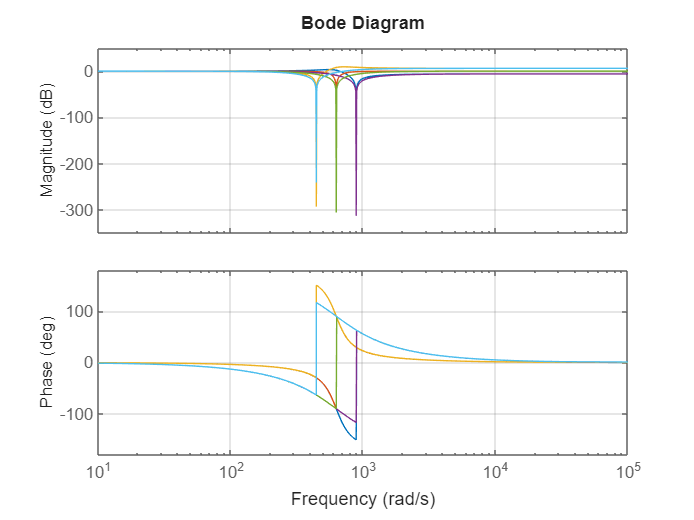

In [4]:
grid on

## Lead Compensator \- First Order

The classic lead is first order tf, with single pole and single zero.


$$H_{lead1} =\frac{s-z}{s-p}$$

 $|z|<|p|$ \- Lead Compensator


 $|z|>|p|$ \- Lag Compensator


The frequency for max. phase is between the pole and zero frequencies. The ratio dictates the amount of phase added and the gain at low frequencies. At high freq. the gain is back to 1 (0dB)


Good practice is not to make the ratio more than 10 of phase addition more than 30deg.


In [5]:
z = 30;
p = 120;

figure(3)
hold on
for indz=1:length(z)
    for indp=1:length(p)
        tf_ll = tf([1 z(indz)], [1 p(indp)])

        bodeplot(tf_ll)
    end
end

tf_ll =
 
  s + 30
  -------
  s + 120
 
Continuous-time transfer function.
Model Properties


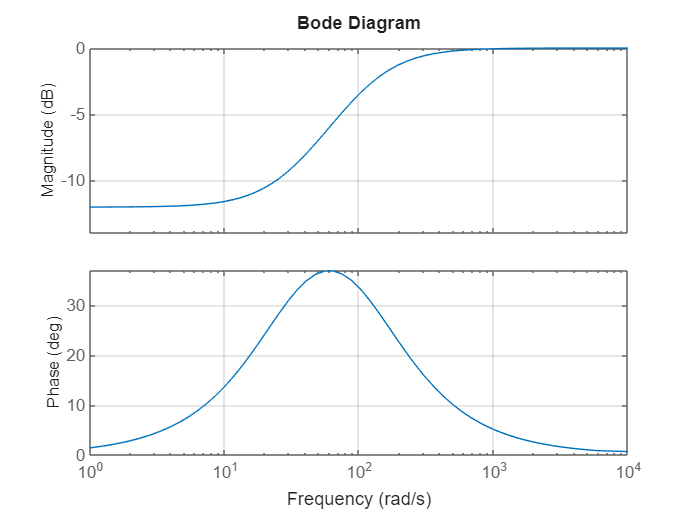

In [6]:
grid on

## Lead Compensator \- Second Order

$$a_1 ,a_2 ,b_1 \not= 0$$

$$H(s)=\frac{1+2\cdot a_1 \cdot Ts+a_2 \cdot (Ts)^2 }{1+2\cdot b_1 \cdot Ts+(Ts)^2 }\Leftrightarrow \frac{a_2 s^2 +2a_1 \omega s+\omega^2 }{s^2 +2b_1 \omega s+\omega^2 }$$

For $a_1 =1$ the poles and zeros cancel out.


 $a_2 >1$ \- creates Lead Compensator. (See Lag compensator in next section)


Poles and zeros dictate the knee frequencies. The maximal phase added between them. The distance influences the max amount of phase added. Compensate the added gain by chnging the loop gain.


 $a_1$ \- is damping of the zeros. For lead \- the highter frequencies.


 $b_1$ \- is damping of the poles. For lead \- the lower frequencies.


Ration between $a_1$ and $b_1$ affects the overall damping too.


In [7]:
freq = 100; %[Hz]

b1 = [0.2 0.7];
a1 = [0.2 0.7];
a2 = 2;

omega = 2*pi*freq;
T = 1/omega;

figure(4)
hold on
for indb = 1:length(b1)
    for inda1 = 1:length(a1)
        for inda2 = 1:length(a2)
            tf_lead2 = tf([a2(inda2)*T^2, 2*a1(inda1)*T, 1], [T^2, 2*b1(indb)*T, 1])

            bodeplot(tf_lead2)
        end
    end
end

tf_lead2 =
 
  5.066e-06 s^2 + 0.0006366 s + 1
  -------------------------------
  2.533e-06 s^2 + 0.0006366 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lead2 =
 
  5.066e-06 s^2 + 0.002228 s + 1
  -------------------------------
  2.533e-06 s^2 + 0.0006366 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lead2 =
 
  5.066e-06 s^2 + 0.0006366 s + 1
  -------------------------------
  2.533e-06 s^2 + 0.002228 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lead2 =
 
  5.066e-06 s^2 + 0.002228 s + 1
  ------------------------------
  2.533e-06 s^2 + 0.002228 s + 1
 
Continuous-time transfer function.
Model Properties


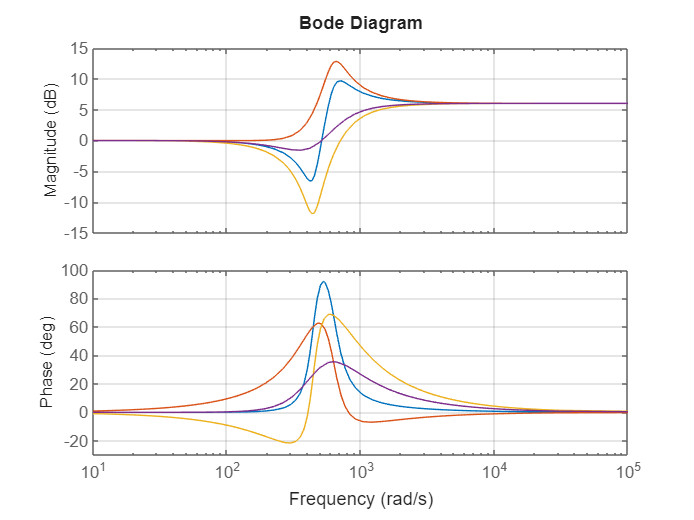

In [8]:
grid on

## Lag Compensator \- First Order

he classic lag is first order tf, with single pole and single zero.


$$H_{lead1} =\frac{s-z}{s-p}$$

 $|z|<|p|$ \- Lead Compensator


 $|z|>|p|$ \- Lag Compensator


The frequency for max. phase is between the pole and zero frequencies. The ratio dictates the amount of phase lost and the gain at low frequencies. At high freq. the gain is back to 1 (0dB)


Good practice is not to make the ratio more than 10 of phase addition more than 30deg.


Lag compensator is usually used to add gain in low frequency and lower steady state error.


In [9]:
z = 120;
p = 30;

figure(5)
hold on
for indz=1:length(z)
    for indp=1:length(p)
        tf_lag = tf([1 z(indz)], [1 p(indp)])

        bodeplot(tf_lag)
    end
end

tf_lag =
 
  s + 120
  -------
  s + 30
 
Continuous-time transfer function.
Model Properties


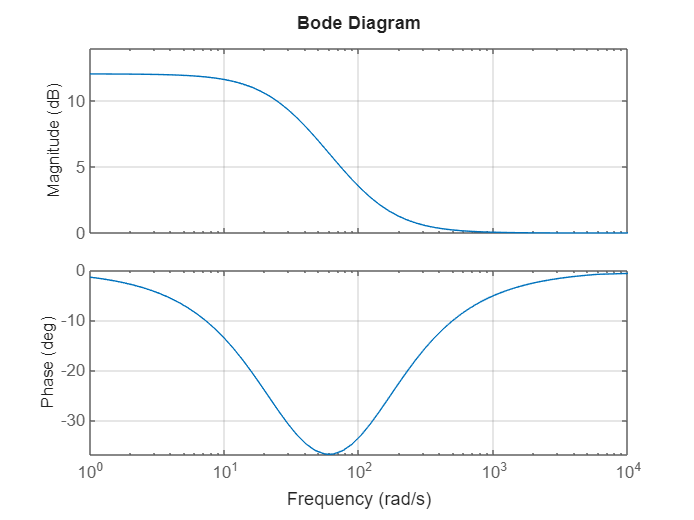

In [10]:
grid on

## Lag Compensator \- Second Order

$$a_1 ,a_2 ,b_1 \not= 0$$

$$H(s)=\frac{1+2\cdot a_1 \cdot Ts+a_2 \cdot (Ts)^2 }{1+2\cdot b_1 \cdot Ts+(Ts)^2 }\Leftrightarrow \frac{a_2 s^2 +2a_1 \omega s+\omega^2 }{s^2 +2b_1 \omega s+\omega^2 }$$

For $a_1 =1$ the poles and zeros cancel out.


 $a_2 <1$ \- creates Lag Compensator. (See Lead compensator in previous section)


Poles and zeros dictate the knee frequencies. The maximal phase added between them. The distance influences the max amount of phase added. Compensate the added gain by chnging the loop gain.


 $a_1$ \- is damping of the zeros. For lag \- the lower frequencies.


 $b_1$ \- is damping of the poles. For lag \- the higher frequencies.


Ration between $a_1$ and $b_1$ affects the overall damping too.


The advantage of using second orged lag compensator is the option to crate "softer" notch filter and lower the gain at high frequencies.


In [11]:
freq = 140; %[Hz]

b1 = [0.3 0.5 0.7 0.9 ];
a1 = 0.3;
a2 = 0.5;

omega = 2*pi*freq;
T = 1/omega;

figure(6)
hold on
for indb = 1:length(b1)
    for inda1 = 1:length(a1)
        for inda2 = 1:length(a2)
            tf_lag2 = tf([a2(inda2)*T^2, 2*a1(inda1)*T, 1], [T^2, 2*b1(indb)*T, 1])

            bodeplot(tf_lag2)
        end
    end
end

tf_lag2 =
 
  6.462e-07 s^2 + 0.0006821 s + 1
  -------------------------------
1.292e-06 s^2 + 0.0006821 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lag2 =
 
  6.462e-07 s^2 + 0.0006821 s + 1
  -------------------------------
1.292e-06 s^2 + 0.001137 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lag2 =
 
  6.462e-07 s^2 + 0.0006821 s + 1
  -------------------------------
1.292e-06 s^2 + 0.001592 s + 1
 
Continuous-time transfer function.
Model Properties
tf_lag2 =
 
  6.462e-07 s^2 + 0.0006821 s + 1
  -------------------------------
1.292e-06 s^2 + 0.002046 s + 1
 
Continuous-time transfer function.
Model Properties


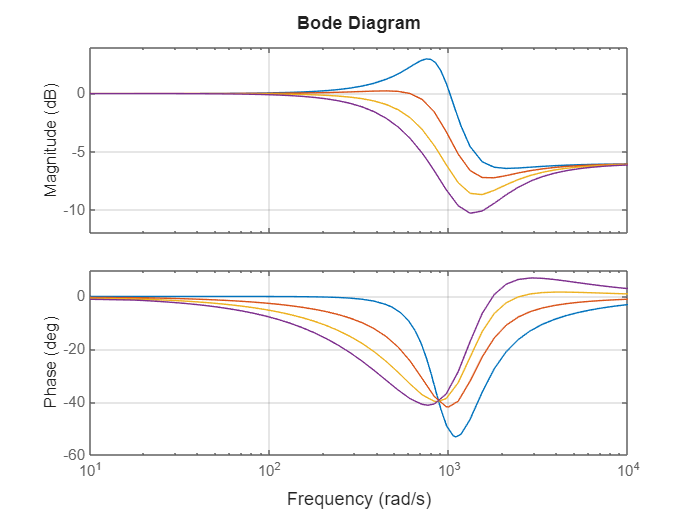

In [12]:
grid on